In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("amazon (1).csv")

In [3]:
data

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [4]:
data['reviewText']

0        This is a one of the best apps acording to a b...
1        This is a pretty good version of the game for ...
2        this is a really cool game. there are a bunch ...
3        This is a silly game and can be frustrating, b...
4        This is a terrific game on any pad. Hrs of fun...
                               ...                        
19995    this app is fricken stupid.it froze on the kin...
19996    Please add me!!!!! I need neighbors! Ginger101...
19997    love it!  this game. is awesome. wish it had m...
19998    I love love love this app on my side of fashio...
19999    This game is a rip off. Here is a list of thin...
Name: reviewText, Length: 20000, dtype: object

In [5]:
data['Positive']

0        1
1        1
2        1
3        1
4        1
        ..
19995    0
19996    1
19997    1
19998    1
19999    0
Name: Positive, Length: 20000, dtype: int64

In [6]:
nullVal = data.isnull().any()

In [7]:
print(nullVal)

reviewText    False
Positive      False
dtype: bool


In [8]:
def preprocess_sentence(sent):
    
    tokenizedSentence = word_tokenize(sent.lower())
    filteredSentence = [token for token in tokenizedSentence if token not in stopwords.words('english')]
    
    lemmat = WordNetLemmatizer()
    lemmatTokens = [lemmat.lemmatize(token) for token in filteredSentence]
    
    processedSentence = ' '.join(lemmatTokens)
    
    return processedSentence

In [9]:
data['reviewText'] = data['reviewText'].apply(preprocess_sentence)

In [10]:
data

,reviewText,Positive
0,one best apps acording bunch people agree bomb...,1
1,pretty good version game free . lot different ...,1
2,really cool game . bunch level find golden egg...,1
3,"silly game frustrating , lot fun definitely re...",1
4,terrific game pad . hr fun . grandkids love . ...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,love love love app side fashion story fight wo...,1


In [11]:
sentAnalyzer = SentimentIntensityAnalyzer()

In [12]:
def sentiment_scores(sent):
    
    scored = sentAnalyzer.polarity_scores(sent)
    
    sentimentScore = 1 if scored['compound'] > 0 else 0
    
    return sentimentScore

In [13]:
data['sentimentScore'] = data['reviewText'].apply(sentiment_scores)

In [14]:
data

,reviewText,Positive,sentimentScore
0,one best apps acording bunch people agree bomb...,1,1
1,pretty good version game free . lot different ...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"silly game frustrating , lot fun definitely re...",1,1
4,terrific game pad . hr fun . grandkids love . ...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,please add ! ! ! ! ! need neighbor ! ginger101...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,love love love app side fashion story fight wo...,1,1


In [15]:
actualCounts = data['Positive'].value_counts()

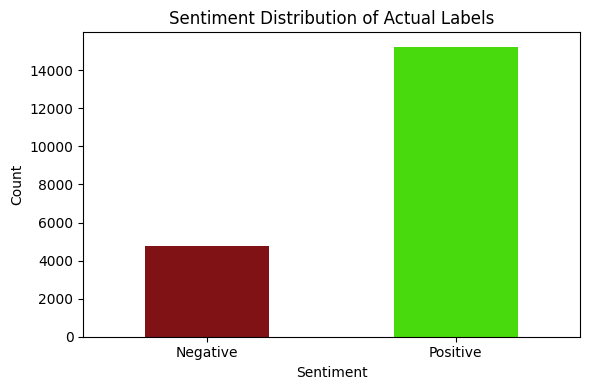

In [16]:
plt.figure(figsize=(6,4))
actualCounts[::-1].plot(kind='bar', color=['#801215', '#49DA0E'])
plt.title('Sentiment Distribution of Actual Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0,1], ['Negative', 'Positive'], rotation=0)
plt.tight_layout()
plt.show()

In [17]:
print(actualCounts)

1    15233
0     4767
Name: Positive, dtype: int64


In [18]:
sentimentCounts = data['sentimentScore'].value_counts()

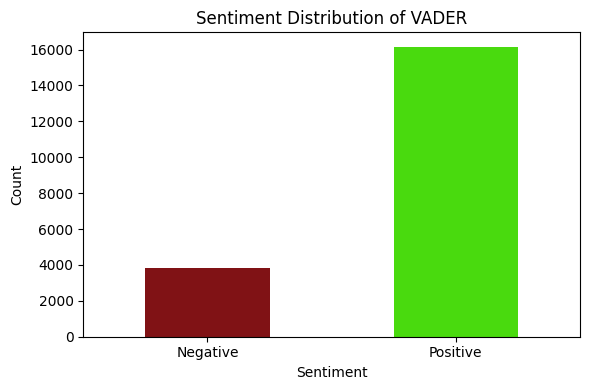

In [19]:
plt.figure(figsize=(6,4))
sentimentCounts[::-1].plot(kind='bar', color=['#801215', '#49DA0E'])
plt.title('Sentiment Distribution of VADER')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0,1], ['Negative', 'Positive'], rotation=0)
plt.tight_layout()
plt.show()

In [20]:
print(sentimentCounts)

1    16154
0     3846
Name: sentimentScore, dtype: int64


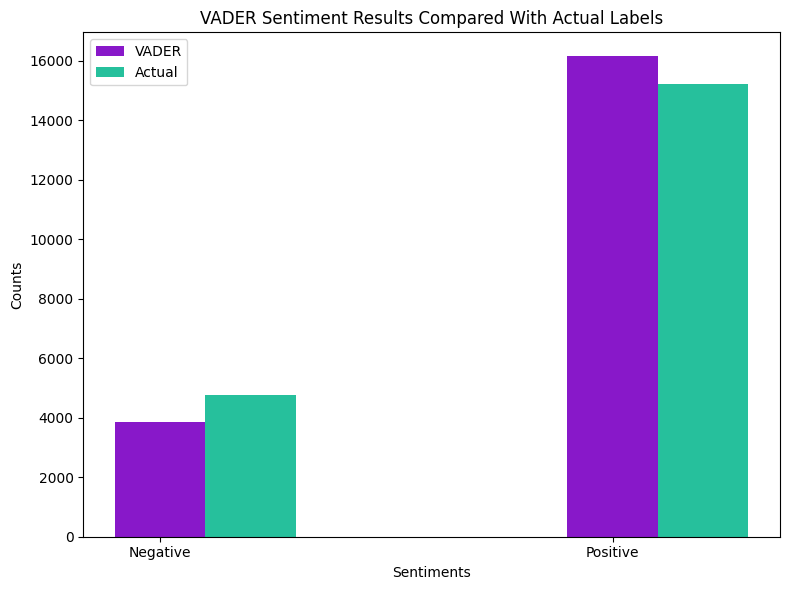

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(sentimentCounts.index, sentimentCounts.values, width=0.2, label='VADER', color='#8818C9')

pos = [i + 0.2 for i in actualCounts.index]
ax.bar(pos, actualCounts.values, width=0.2, label='Actual', color='#26C09C')


ax.set_title('VADER Sentiment Results Compared With Actual Labels')
ax.set_xlabel('Sentiments')
ax.set_ylabel('Counts')
ax.set_xticks([0,1], ['Negative','Positive'])
ax.legend()

plt.tight_layout()
plt.show()

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(data['Positive'], data['sentimentScore']))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55      4767
           1       0.85      0.90      0.88     15233

    accuracy                           0.81     20000
   macro avg       0.74      0.70      0.72     20000
weighted avg       0.80      0.81      0.80     20000

